<a href="https://colab.research.google.com/github/EduGod0y/FPI/blob/main/Trabalho_1_FPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INF01046 – Fundamentos de Processamento de Imagens
###Manuel M. Oliveira

###Primeiro Trabalho de Implementação
##**Operações Básicas sobre Imagens Digitais**

###Parte I – Leitura e Gravação de Arquivos de Imagens (20 pontos)

1) Escreva um programa para ler arquivos de imagens e regravá-los com um outro nome. Esta
tarefa simples tem o objetivo de familiarizá-la(o) com o uso de bibliotecas para leitura e
gravação de arquivos. O seu programa deve suportar pelo menos o formato JPEG. Teste o seu
programa com imagens JPEG (e.g., utilize as imagens disponibilizadas para o trabalho). Para
essas imagens, verifique seus tamanhos em cada imagem do par (original e arquivo gravado).
Você percebe alguma diferença visual entre elas? Alguma diferença nos tamanhos dos
arquivos? Caso haja diferença nos tamanhos de arquivos, faça uma pequena pesquisa na web
sobre arquivos JPEG e tente explicar a causa da diferença observada. 

In [ ]:
!pip install Pillow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

from PIL import Image
import os, sys
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




# read an image
img = Image.open("Space_187k.jpg")

print(img.format, img.size, img.mode)

with Image.open("Space_187k.jpg") as img:
  img.save("imagem.jpeg")


JPEG (512, 384) RGB


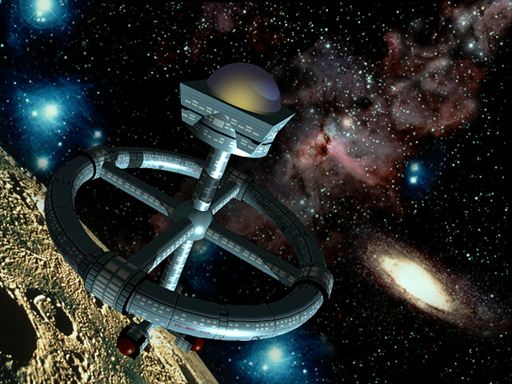

In [ ]:
display.display(img)

###Parte II – Leitura, Exibição e Operações sobre Imagens (80 pontos)
Nessa etapa, estaremos aplicando algumas operações sobre imagens. Para tanto, estenda o
programa que você desenvolveu na Parte I para exibir as imagens lidas e utilize alguma
ferramenta/toolkit para fazer a gerência de janelas para você. O seu programa deve exibir duas
janelas separadas (ou duas imagens lado a lado em uma mesma janela). Mostre a imagem
original à esquerda, e o resultado da operação realizada sobre ela à direita.

a) (25 pontos) Espelhamento horizontal e vertical da imagem original. Ao espelhar
(verticalmente/horizontalmente) a imagem um número par de vezes, você deverá obter a
imagem original. Procure implementar estas operações de modo eficiente (dica: considere o uso
do comando memcpy) sempre que possível, ao invés de trocar um par de pixels por vez.
Certifique-se de que a operação funciona para imagens tanto com número par como com
número ímpar de linhas e colunas. 

In [ ]:
img2 = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

out_v = img.transpose(Image.Transpose.FLIP_TOP_BOTTOM)


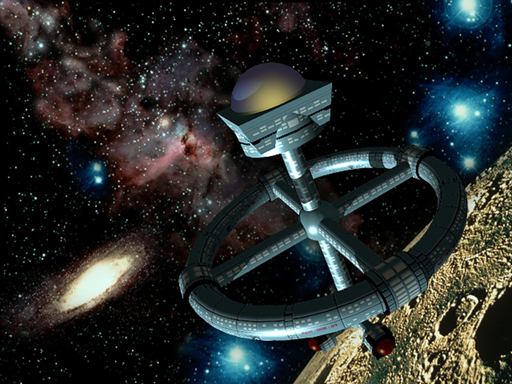

In [ ]:
display.display(img2)

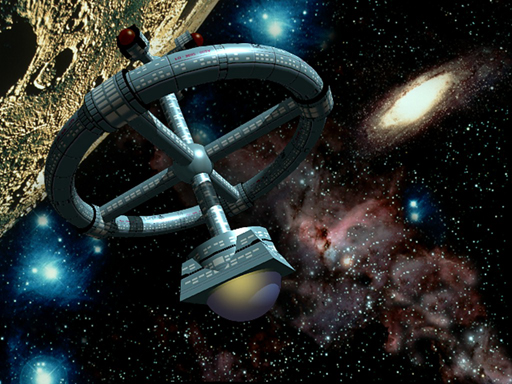

In [ ]:
display.display(out_v)

b) (20 pontos) Conversão de imagem colorida para tons de cinza (luminância). Uma
imagem em tons de cinza pode ser obtida a partir de uma imagem colorida aplicando-se a
seguinte fórmula para cada um dos pixels da imagem original:
L = 0.299*R + 0.587*G + 0.114*B,
onde R, G e B são as componentes de cor do pixel original. Ao criar uma imagem a ser exibida
em tons de cinza, para cada pixel pi, faça: Ri = Gi = Bi = Li;

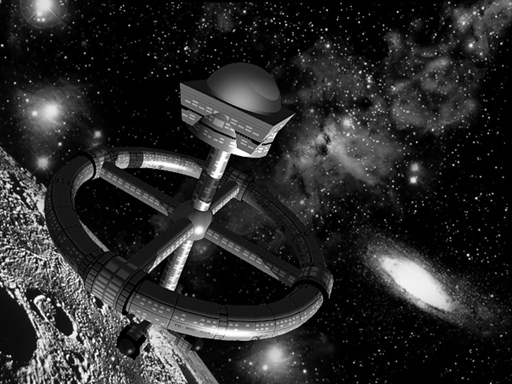

In [ ]:
img_L = img.convert("L")
img_L.save('imagem_L.jpeg')
display.display(img_L)

c) (25 pontos) Quantização (de tons) sobre as imagens em tons de cinza. Note que, neste
caso, como a dimensão do espaço de cor é 1, tal processo de quantização se torna bastante
simples. Assim, o seu programa deve receber como entrada o (máximo) número de tons a ser
utilizados no processo de quantização.

In [ ]:
imgL = mpimg.imread('imagem_L.jpeg')

for arr in imgL.ravel():
    plt.hist(arr, bins=30)
#plt.hist(imgL.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')